# Исследование рынка заведений общественного питания в Москве

## Обзор данных

In [1]:
#импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re 
warnings.filterwarnings('ignore')

In [2]:
#импортируем сторонние датасет с данными об улицах и районах 
from io import BytesIO
import requests
spreadsheet_id = '1_jxtium5SXfSGrOWYx5zSJapT1ENOHTTQNe7SIa_zkE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
street_district = pd.read_csv(BytesIO(r.content))
street_district.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [3]:
try:
    data = pd.read_csv("C:/Users/User/Desktop/rest_data.csv") #локальный путь
except :
    data = pd.read_csv("/datasets/rest_data.csv") #серверный путь

Ознакомимся с таблицей rest_data:

In [4]:
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице `rest_data` таблице представлены данные о заведениях Москвы. Из описания к данным известно, что: 
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест

В таблице нет пропусков. Нарушений в типах данных нет. Проверим таблицу на дубликаты:

In [5]:
data[data.duplicated()] #проверяем на дубликаты 

,id,object_name,chain,object_type,address,number


Явных дубликатов в таблице нет.

Согласно описанию данных в столбце `id` указан уникальный идентификатор объекта. Значит в таблице могут быть неявные дубликаты. Проверим таблицу на дубликаты без столбца  - `id`:

In [6]:
pd.set_option("max_colwidth", 120) #для полного отображения содержания столбцов
df_new = data[['object_name', 'chain', 'object_type', 'address', 'number']] #сохраняем все столбцы кроме id
display(df_new.info())
df_new.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15366 non-null  object
 1   chain        15366 non-null  object
 2   object_type  15366 non-null  object
 3   address      15366 non-null  object
 4   number       15366 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 600.4+ KB


None

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [7]:
df_new[df_new.duplicated()] #поиск дубликатов в таблице без столбца id

,object_name,chain,object_type,address,number
2381,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
3481,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, корпус 1",20
...,...,...,...,...,...
14578,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корпус 1",0


В таблице присутствуют полные дубликаты: с одниковым названием и адресом.Удалим дубликаты,сохраним новую таблицу в новую переменную .

In [8]:
df = df_new.drop_duplicates()
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15284 non-null  object
 1   chain        15284 non-null  object
 2   object_type  15284 non-null  object
 3   address      15284 non-null  object
 4   number       15284 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 716.4+ KB


None

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Дубликаты удалены. 

### Выводы: 

1. В таблице `rest_data` представлены данные о заведениях общественного питания Москвы.
2. Пропусков, нарушения типов данных в таблице нет
3. Дубликаты из таблицы удалены

## Предобработка данных

В столбце с названиями заведений названия указаны разным регистром, исправим это:

In [9]:
df['object_name'] = df['object_name'].str.lower() # приводим все названия к нижнему регистру 
df.head(10)

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


Получим список уникальных названий заведений:

In [10]:
list(df['object_name'].unique())

['сметана',
 'родник',
 'кафе «академия»',
 'пиццетория',
 'кафе «вишневая метель»',
 'стол. при гоу сош № 1051',
 'брусника',
 'буфет мтуси',
 'кпф семья-1',
 'столовая мтуси',
 'пекарня 24',
 'гогиели',
 'школа 735',
 'алло пицца',
 'гимназия 1542',
 'школа 1011',
 'суши wok',
 'донер кебаб',
 'тануки',
 'американская лаборатория десертов',
 'кафе',
 'кафе уют',
 'долина чайхона',
 'гбоу школа № 1411 (970)',
 'кафетерий',
 "домино'с пицца",
 'рахимкулова т.х.',
 'столовая при гуп объединенный комбинат школьного питания',
 'школа 1444',
 'мархал',
 'готика',
 'гимназия № 1527',
 'кафе «хинкальная»',
 'рыба & мясо на углях',
 'кларом',
 'месопотамия',
 'му-му',
 'хлеб насущный',
 'tajj mahal',
 'калифорния дайнер',
 'балалаечная',
 'пиросмани',
 'данкин донатс',
 'вареничная №1',
 'шоколадница',
 'il pizzaiolo',
 'теремок',
 'мосбург',
 'эрик рыжий',
 'домашняя снедь',
 'хинкальная',
 'восточный квартал',
 'почтмейстер',
 'босфор',
 'мастер',
 'шантимель',
 'буфет при астраханских баня

В названиях заведений есть дубликаты: одно и тоже заведение написано на русском и английском языках. Однако исправлять все названия вручную не оптиамльно. Оставим названия в прежнем виде. Однако в названиях заведений так же присутствуют специальные символы, которые создают неявные дуюликаты. Удалим эти символы. 

In [11]:
df['object_name_new'] = df['object_name'].str.replace('Ё', 'Е')
df['object_name_new'] = df['object_name_new'].str.replace('-', '')
df['object_name_new'] = df['object_name_new'].str.replace('«', '')
df['object_name_new'] = df['object_name_new'].str.replace('»', '')
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Замены успешно проведены, новый столбец создан с названиями без специальных символов.

В таблице есть столбец `number`, где указано количество посадочных мест. Посмотрим на данные в столбце:

In [12]:
df['number'].describe().reset_index()

,index,number
0,count,15284.000000
1,mean,59.784350
2,std,74.838657
3,min,0.000000
4,25%,14.000000
5,50%,40.000000
6,75%,80.000000
7,max,1700.000000


Таким образом, мы выяснили, что:
* минимальное количество посадочных мест-0
* медиана - 40 мест
* среднее -59 мест
* максимальное количество -1700 мест.

То есть заведение, которое представляет 1700 посадочных мест. Ознакокмимся с заведениями, которые представляют больше 1000 посадочных мест:

In [13]:
df[df['number'] > 1000]

,object_name,chain,object_type,address,number,object_name_new
2313,ресторан «альфа»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040,ресторан альфа
3686,рум сервис,нет,ресторан,"город Москва, площадь Европы, дом 2",1200,рум сервис
4480,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200,рум сервис
8148,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500,банкетный зал шелк
8345,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400,столоваябуфет
9064,комбинат питания «управление академсервис»,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288,комбинат питания управление академсервис
12723,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700,arena by soho family


Среди всех заведений встречаются такие виды объектов, как: ресторан, столовая и бар. Для ресторана и столовой-характерно большое количество посадочных мест. А вот для бара нет. Вероятнее всего, это аномомальное значение. Удалим его.

In [14]:
df = df[df['number'] != 1700] #удаляем заведение с количестом посадочных мест 1700
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15283 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   object_name      15283 non-null  object
 1   chain            15283 non-null  object
 2   object_type      15283 non-null  object
 3   address          15283 non-null  object
 4   number           15283 non-null  int64 
 5   object_name_new  15283 non-null  object
dtypes: int64(1), object(5)
memory usage: 835.8+ KB


None

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


In [15]:
df['number'].describe() #повторно смотрим описание данных

count    15283.000000
mean        59.677027
std         73.655519
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1500.000000
Name: number, dtype: float64

### Выводы:
1. Был исправлен разный регистр в столбце с названиями заведений 
2. Удалены специальные символы из навзаний заведений. Новые названия сохранены в новом столбце.
3. Удалено аномальное значение. 


## Исследовательский анализ

### Соотношение видов объектов общественного питания по количеству

Исследуем соотношение видов объектов общественного питания, которые указаны в столбце `object_type` по количеству

In [16]:
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Составим таблицу, где будут указаны типы заведений и их количество.

In [17]:
#таблица с уникальными типами заведений и их количеством, сортируем по убыванию
object_type = df.groupby('object_type')['chain'].count().reset_index().sort_values(by='chain', ascending=False)

#переименовываем столбы
object_type = object_type.rename(columns={'chain': 'count'})

#считаем долю каждого типа заведения от общего количества заведений в % и округляем до 2 цифр после запятой
object_type['share'] = ((object_type['count']/df['object_type'].count()) * 100).round(2)
object_type

,object_type,count,share
3,кафе,6071,39.72
8,столовая,2584,16.91
7,ресторан,2282,14.93
6,предприятие быстрого обслуживания,1898,12.42
0,бар,854,5.59
1,буфет,577,3.78
4,кафетерий,395,2.58
2,закусочная,349,2.28
5,магазин (отдел кулинарии),273,1.79


Построим график, что бы выявить какой тип заведений встречается чаще всего и реже всего.

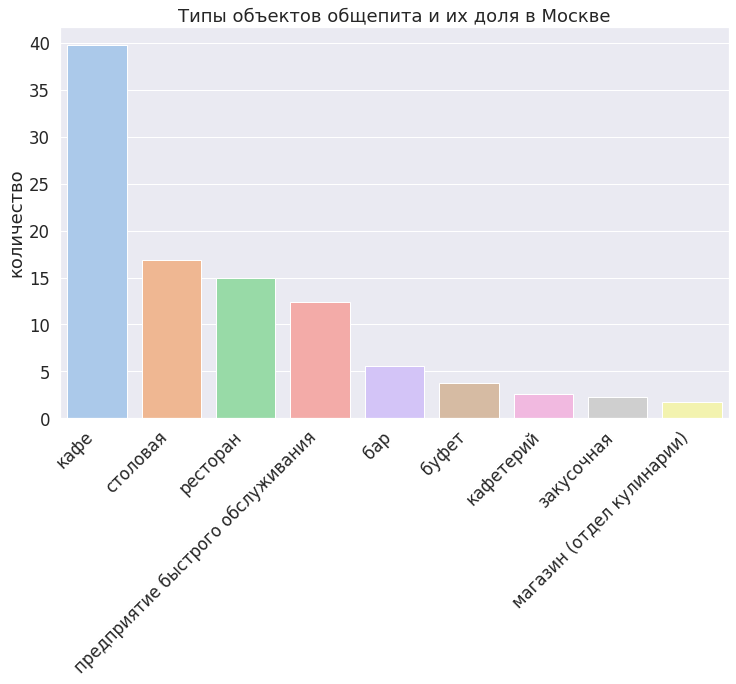

In [18]:
plt.figure(figsize=(12,8))

sns.set(font_scale=1.5, palette='pastel') #настройка размера шрифта и палетки
ax = sns.barplot(x='object_type', y='share', data=object_type)
ax.set_xlabel('')
ax.set_ylabel('количество')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х

ax.set_title('Типы объектов общепита и их доля в Москве');

#### Вывод:
По графику видно, что типы заведений общественного питания в Москве распределены не равномерно:
* больше всего заведений типа "кафе" (около 40 %)
* меньше всего заведений типа "магазин(отдел кулинарии)" (менее 5 %)

### Соотношение сетевых и несетевых заведений по количеству

Рассмотрим соотношение сетевых и несетевых заведений по количеству в Мосвке. Данные о том, сетевое ли заведение или нет, содержатся в столбце `chain`

In [19]:
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


In [20]:
#создаем таблицу с количеством сетевых и несетевых заведений 
chain = df.groupby('chain')['object_type'].count().reset_index().sort_values(by='object_type', ascending=False)
chain = chain.rename(columns={'object_type':'count'})

#расчитаем долю заведений от общего числа 
chain['share'] = (chain['count']/df['chain'].count() * 100).round()
chain

,chain,count,share
1,нет,12319,81.0
0,да,2964,19.0


Построим график, что бы увидеть соотношение сетевых и несетевых заведений общепита в Мосвке:

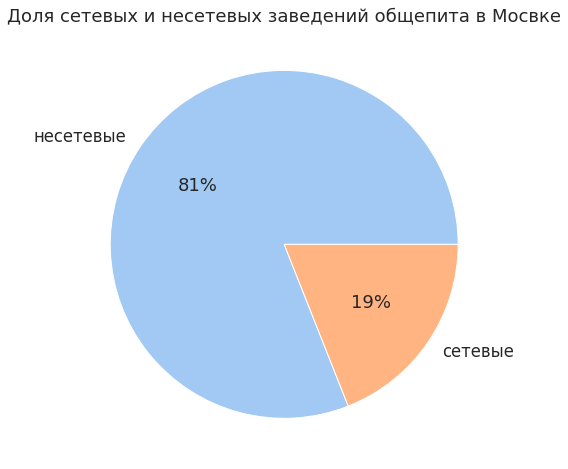

In [21]:
plt.figure(figsize=(8,8))
plt.pie(x='share',data=chain, labels= ['несетевые', 'сетевые'], autopct = '%0.0f%%')
plt.title('Доля сетевых и несетевых заведений общепита в Мосвке')
plt.show;

#### Вывод:
По графику видно, что сетевые и несетевые заведения общественного питания в Москве распределены не равномерно:
* больше всего несетевых заведений (81 %)
* меньше всего сетевых заведений (19 %)

### Определение вида объекта общественного питания с характерным сетевым распространением

Выясним, для какого вида объекта общественного питания характерно сетевое распространение:

In [22]:
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Построим таблицу, где будут следующие признаки:
* тип заведения
* сетевое/несетевое заведение
* количество заведений сетевых/несетевых

In [23]:
object_type_chain = df.groupby(['object_type','chain'])['object_name'].agg('count').reset_index()
object_type_chain

,object_type,chain,object_name
0,бар,да,37
1,бар,нет,817
2,буфет,да,11
3,буфет,нет,566
4,закусочная,да,56
5,закусочная,нет,293
6,кафе,да,1396
7,кафе,нет,4675
8,кафетерий,да,52
9,кафетерий,нет,343


Далее присоеденим к новой таблице уже имеющуюся таблицу `object_type`, с общим количеством завдений каждого типа:

In [24]:
object_type.head()

,object_type,count,share
3,кафе,6071,39.72
8,столовая,2584,16.91
7,ресторан,2282,14.93
6,предприятие быстрого обслуживания,1898,12.42
0,бар,854,5.59


In [25]:
object_type_chain = object_type_chain.merge(object_type, on='object_type')
object_type_chain = object_type_chain.rename(columns={'object_name':'count', 'count':'total_count'}) #переименовываем столбец
object_type_chain

,object_type,chain,count,total_count,share
0,бар,да,37,854,5.59
1,бар,нет,817,854,5.59
2,буфет,да,11,577,3.78
3,буфет,нет,566,577,3.78
4,закусочная,да,56,349,2.28
5,закусочная,нет,293,349,2.28
6,кафе,да,1396,6071,39.72
7,кафе,нет,4675,6071,39.72
8,кафетерий,да,52,395,2.58
9,кафетерий,нет,343,395,2.58


Удалим из таблицы лишний столбец `share`:

In [26]:
object_type_chain = object_type_chain[['object_type','chain', 'count', 'total_count']]
object_type_chain

,object_type,chain,count,total_count
0,бар,да,37,854
1,бар,нет,817,854
2,буфет,да,11,577
3,буфет,нет,566,577
4,закусочная,да,56,349
5,закусочная,нет,293,349
6,кафе,да,1396,6071
7,кафе,нет,4675,6071
8,кафетерий,да,52,395
9,кафетерий,нет,343,395


Теперь расчитаем долю сетевых/несетевых заведений от общего количества завдений данного вида.

In [27]:
object_type_chain['share'] = (object_type_chain['count'] / object_type_chain['total_count'])* 100
object_type_chain.head()

,object_type,chain,count,total_count,share
0,бар,да,37,854,4.332553
1,бар,нет,817,854,95.667447
2,буфет,да,11,577,1.906412
3,буфет,нет,566,577,98.093588
4,закусочная,да,56,349,16.045845


Построим график, для наглядного отображения таблицы:

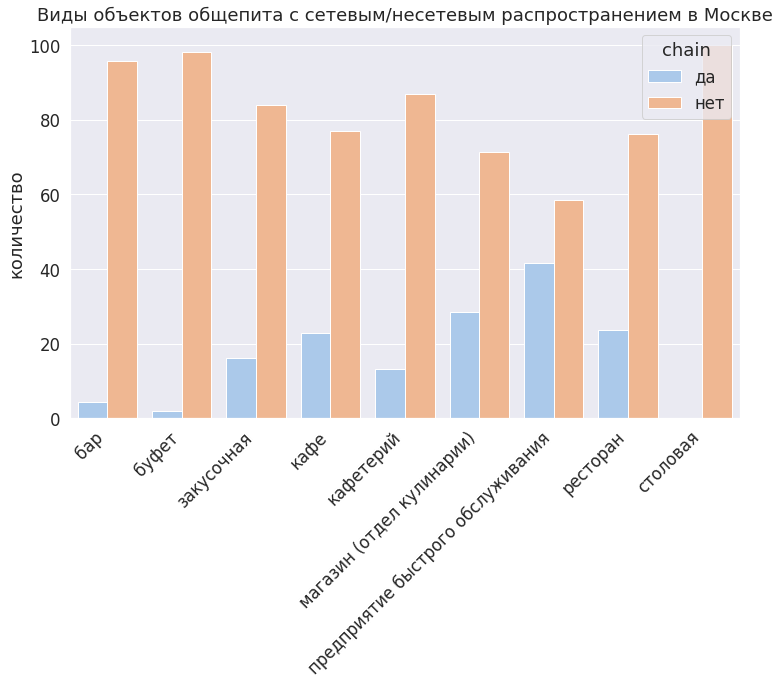

In [28]:
plt.figure(figsize=(12,8))

sns.set(font_scale=1.5, palette='pastel' ) #настройка размера шрифта и палетки
ax = sns.barplot(x='object_type', y= 'share', data=object_type_chain, hue='chain')
ax.set_xlabel('')
ax.set_ylabel('количество')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х
ax.set_title('Виды объектов общепита с сетевым/несетевым распространением в Москве');

#### Вывод:
По графику видно, что виды заведений общественного питания в Москве по распространению (сетевые и несетевые) распределены не равномерно:
* характерно сетевое распространение  для объектов вида "предприятие быстрого обслуживания" (лидеры), "магазин", "кафе", "ресторан" 
* НЕ характерно сетевое распространение для объектов типа "буфет" и "столовая" 


В целом, по графику можно сказать, что для всех видов заведений общественного питания в Москве  НЕ характерно сетевое распространение.

### Определение характерных особенностей сетевых заведений

Выясним, что характерно для сетевых заведений: 
* много заведений с небольшим числом посадочных мест в каждом 
* мало заведений с большим количеством посадочных мест

Для этого возьмем тоолько сетевые заведения общественного питания в Москве и изучим количество посадочных мест в них. 
Данные о количестве посадочных мест хранится в столбце `number`

In [29]:
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Выделим сетевые заведения общепита Москвы в отдельную переменную.

In [30]:
chain_rest = df[df['chain'] == "да"]
chain_rest.head(10)

,object_name,chain,object_type,address,number,object_name_new
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
6,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника
13,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,алло пицца
16,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,суши wok
18,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,тануки
25,домино'с пицца,да,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24,домино'с пицца
30,готика,да,ресторан,"город Москва, Ангарская улица, дом 39",65,готика
33,суши wok,да,кафе,"город Москва, проспект Андропова, дом 30",4,суши wok
37,му-му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,муму
38,хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 6/2",20,хлеб насущный


Создадим таблицу с уникальным значениями посадочных мест и их количеством, что бы определить категории по количеству мест для заведений:

In [31]:
number = chain_rest.groupby('number')['chain'].count().reset_index()
number = number.rename(columns={'chain':'count'})
number.head()

,number,count
0,0,265
1,1,15
2,2,29
3,3,16
4,4,44


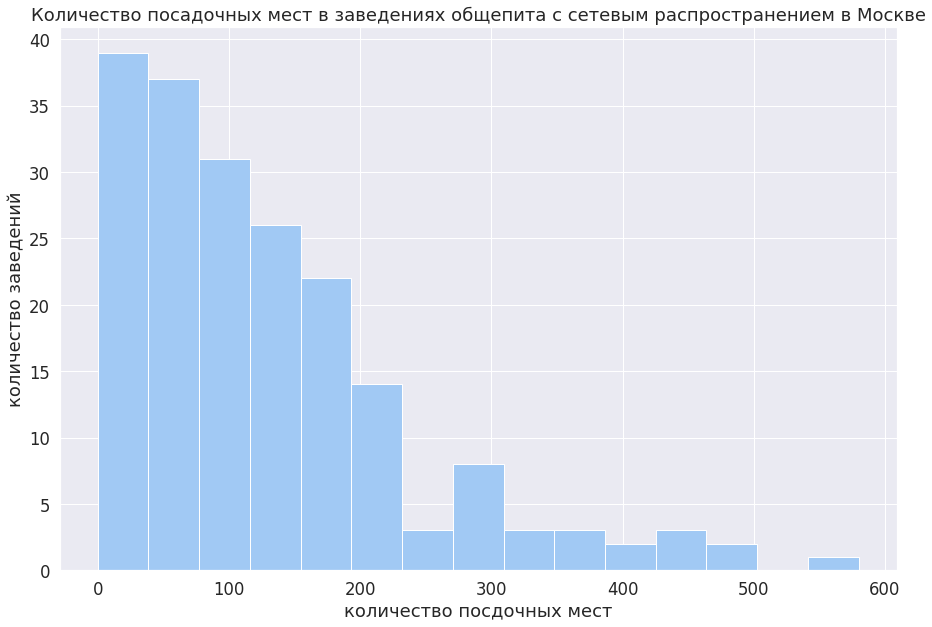

In [32]:
plt.figure(figsize=(15,10))
plt.hist(x='number', data=number,bins=15)
plt.ylabel('количество заведений')
plt.xlabel('количество посдочных мест')

plt.title('Количество посадочных мест в заведениях общепита с сетевым распространением в Москве');

По графику видно, что количество мест в сетевых заведениях общественного питания в Мосвке отличается6 Исходя из графика, разделим заведения общественного питания на катеогрии по количеству посадочных мест:

* малое количество посадочных мест-это заведения с количеством посадочных мест от 0 до 100 мест
* среднее количество посадочных мест -это заведение с количествои посадочных мест от 100 до 250 мест 
* большое количество посадочных мест -это завдения с количеством посадочных мест от 250 и более мест

PS. Уважаемый ревьюер, я делал выводы исходя из гистрограммы. но была идея разделить максимальное количество мест на количество категорий (то есть 600/3= по 200 мест на каждую категорию, однако этот подход не отражает гистограмму, поэтому я от него отказалась).

Первый резкое уменьшение количества заведений отмечается при количестве мест около ста, поэтому эту группу я выделила как малое количество посадочных мест, далее резконе падание количества завдений отмечается при уровне мест около 200-эту группу я выделила как среднее количество мест, а все что больше-это большое количество посадочных мест.

Присвоим каждому заведению категорию, в зависимости от количества посадочных мест. Категории мы определили выше.

In [33]:
def category(number):
    if number <= 100:
        return 'малое'
    if number > 100 and number <= 250:
        return 'среднее'
    if number >250:
        return 'большое'

Проверим работу функции

In [34]:
display(category(50))
display(category(100))
display(category(150))
display(category(250))
display(category(350))

'малое'

'малое'

'среднее'

'среднее'

'большое'

Функция работает исправно. Присвоим катеогрии каждому заведению в зависимости от количества посадочных мест.

In [35]:
chain_rest['category'] = chain_rest['number'].apply(category)
chain_rest.head(10)

,object_name,chain,object_type,address,number,object_name_new,category
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,малое
6,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника,малое
13,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,алло пицца,малое
16,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,суши wok,малое
18,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,тануки,среднее
25,домино'с пицца,да,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24,домино'с пицца,малое
30,готика,да,ресторан,"город Москва, Ангарская улица, дом 39",65,готика,малое
33,суши wok,да,кафе,"город Москва, проспект Андропова, дом 30",4,суши wok,малое
37,му-му,да,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,муму,среднее
38,хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 6/2",20,хлеб насущный,малое


Категории присвоены. Теперь построим таблицу, где будет указано количество заведений и количество посадочных мест в нем:

In [36]:
chain_rest_pivot = chain_rest.pivot_table(index=['object_type','category'],  values='chain', aggfunc='count').reset_index()
chain_rest_pivot= chain_rest_pivot.rename(columns={'chain':'count'})
chain_rest_pivot

,object_type,category,count
0,бар,малое,33
1,бар,среднее,4
2,буфет,малое,11
3,закусочная,малое,56
4,кафе,большое,7
5,кафе,малое,1296
6,кафе,среднее,93
7,кафетерий,малое,52
8,магазин (отдел кулинарии),малое,78
9,предприятие быстрого обслуживания,большое,4


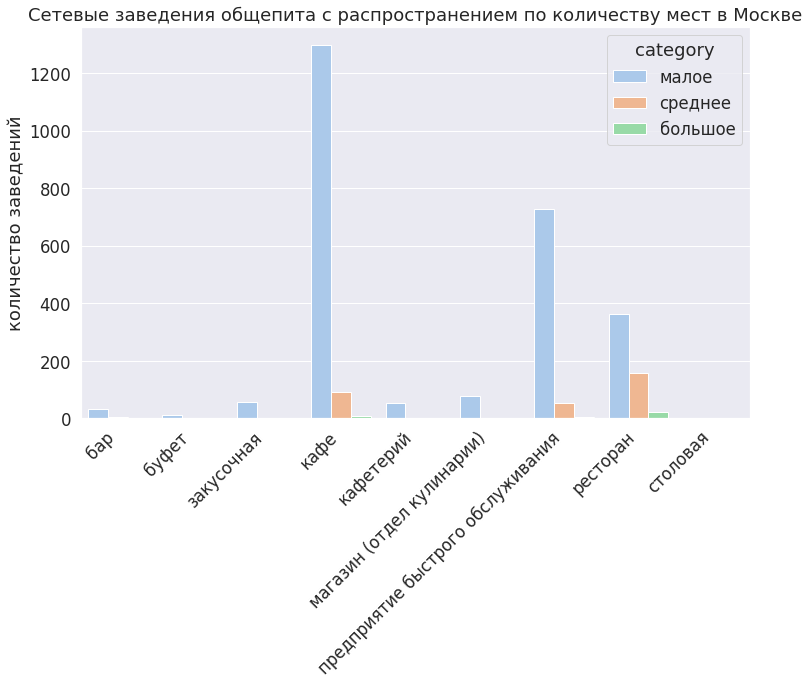

In [37]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x='object_type', y= 'count', data=chain_rest_pivot, hue='category')
ax.set_xlabel('')
ax.set_ylabel('количество заведений')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х
ax.set_title('Сетевые заведения общепита с распространением по количеству мест в Москве');

#### Вывод:
По графику видно, что характерной особенностью сетевых объектов является много заведений с небольшим количеством посадочных мест.

### Среднее количество посадочных мест для каждого вида объекта общепита в Москве 

Выясним:
* среднее количество посадочных мест для каждого вида объекта общественного питания 
* какой вид заведения предоставляет в среднем самое большое количество посадочных мест

PS. Уважаемый ревьюер, учитывая что в количестве посадочных мест разброс большой, а среднее чувствительно к "аномальным" значениям, можно было бы здесь использовать медиану, насколько корректно так делать в реальной работе и в данном проекте?

In [38]:
number_mean = df.pivot_table(
    index='object_type',
    values='number', 
    aggfunc='mean').reset_index().sort_values(by='number', ascending=False)
number_mean

,object_type,number
8,столовая,130.337848
7,ресторан,96.884750
1,буфет,51.509532
0,бар,41.593677
3,кафе,39.785703
6,предприятие быстрого обслуживания,20.808219
4,кафетерий,9.184810
2,закусочная,7.825215
5,магазин (отдел кулинарии),5.589744


Построим график:

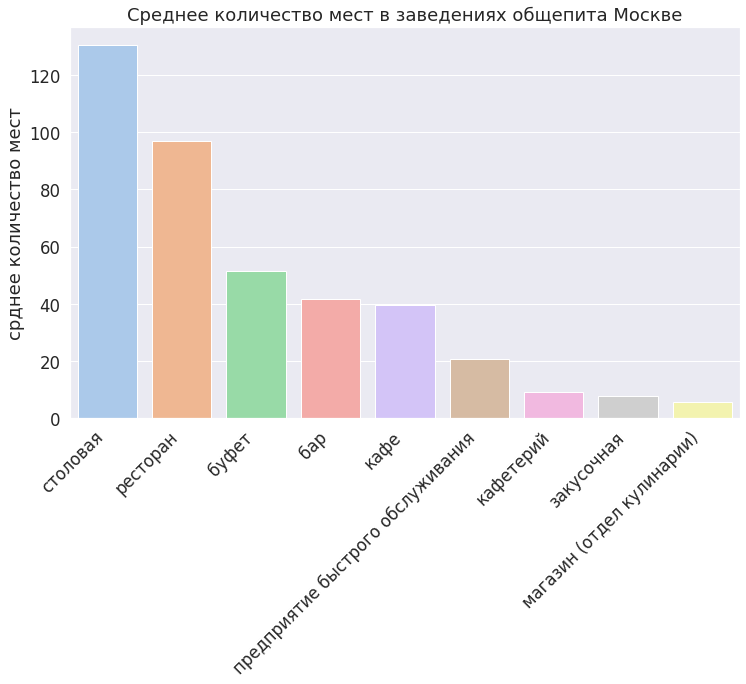

In [39]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x='object_type', y= 'number', data=number_mean)
ax.set_xlabel('')
ax.set_ylabel('срднее количество мест')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х
ax.set_title('Среднее количество мест в заведениях общепита Москве');

#### Выводы: 

По графику видно, что среднее количество посадочных мест в заведениях общепита в Мосвке отличаются:
* столовые в среднем предлагают около 125 посадочныхмест
* рестораны - около 90 посадочных мест
* буфеты - около 50 мест 
* бары - чуть больше 40 мест
* кафе  - около 40 
* предприятия быстрого обслуживания - около 20
* кафетерии - около 10
* закусочные и магазины предоставляют около 5 посадочных мест 

Так же, отметим что наибольшее количество посадочных мест из всех видов объектов общепита в Москве представляют столовые.

### Анализ адресов расположения заведений общепита 

Проанализируем адреса расположений заведений общепита в Москве, что бы опередлить наиболее популярные адреса и адреса, с наименьшим количеством объектов общепита. 

Для этого, сначала, выделим в отдельную таблицу информацию об улице из столбца address.

In [40]:
df.head()

,object_name,chain,object_type,address,number,object_name_new
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Создадим таблицу `streer`, в которой будут указаны только улицы завеений общепита:

In [41]:
# Создание списка ключевых слов, по которым будем выявлять из адреса название улицы
# В список включены значения ['город','поселение','деревня'], поскольку в адресах, 
#где встречаются такие имена, улицы не указано

words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'город','поселение','деревня','аллея','бульвар','набережная','тупик','линия','километр']

# Регулярное выражение для нахождения улицы

reg_exp = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
df['street'] = df['address'].str.extract(reg_exp, flags=re.IGNORECASE)
df.head(10)

,object_name,chain,object_type,address,number,object_name_new,street
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,Абельмановская улица
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,Абрамцевская улица
5,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,стол. при гоу сош № 1051,Абрамцевская улица
6,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника,переулок Сивцев Вражек
7,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,буфет мтуси,Авиамоторная улица
8,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,кпф семья1,Авиамоторная улица
9,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,столовая мтуси,Авиамоторная улица


Теперь, сформируем таблицу, где будут указаны улицы по которым расположены заведения общепита и количество заведений на этой улице:

In [42]:
popular_district = df.pivot_table(
    index='street', 
    values='chain', 
    aggfunc='count').sort_values(by='chain', ascending=False)

popular_district = popular_district.rename(columns={'chain':'count'})

popular_district.head(10)

,count
street,
проспект Мира,204
Профсоюзная улица,181
Ленинградский проспект,170
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
город Зеленоград,129
проспект Вернадского,128
Кутузовский проспект,113


В таблицу попал город Зеленоград. Но так как нас интересует только город Москва-исключим этот город из таблицы и сохраним топ-10 улиц в отдельную переменную:

In [43]:
popular_district_top10 = popular_district.query('street != "город Зеленоград"').reset_index().head(10)
popular_district_top10 

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,113
8,Каширское шоссе,111
9,Кировоградская улица,108


Построим график по таблице:

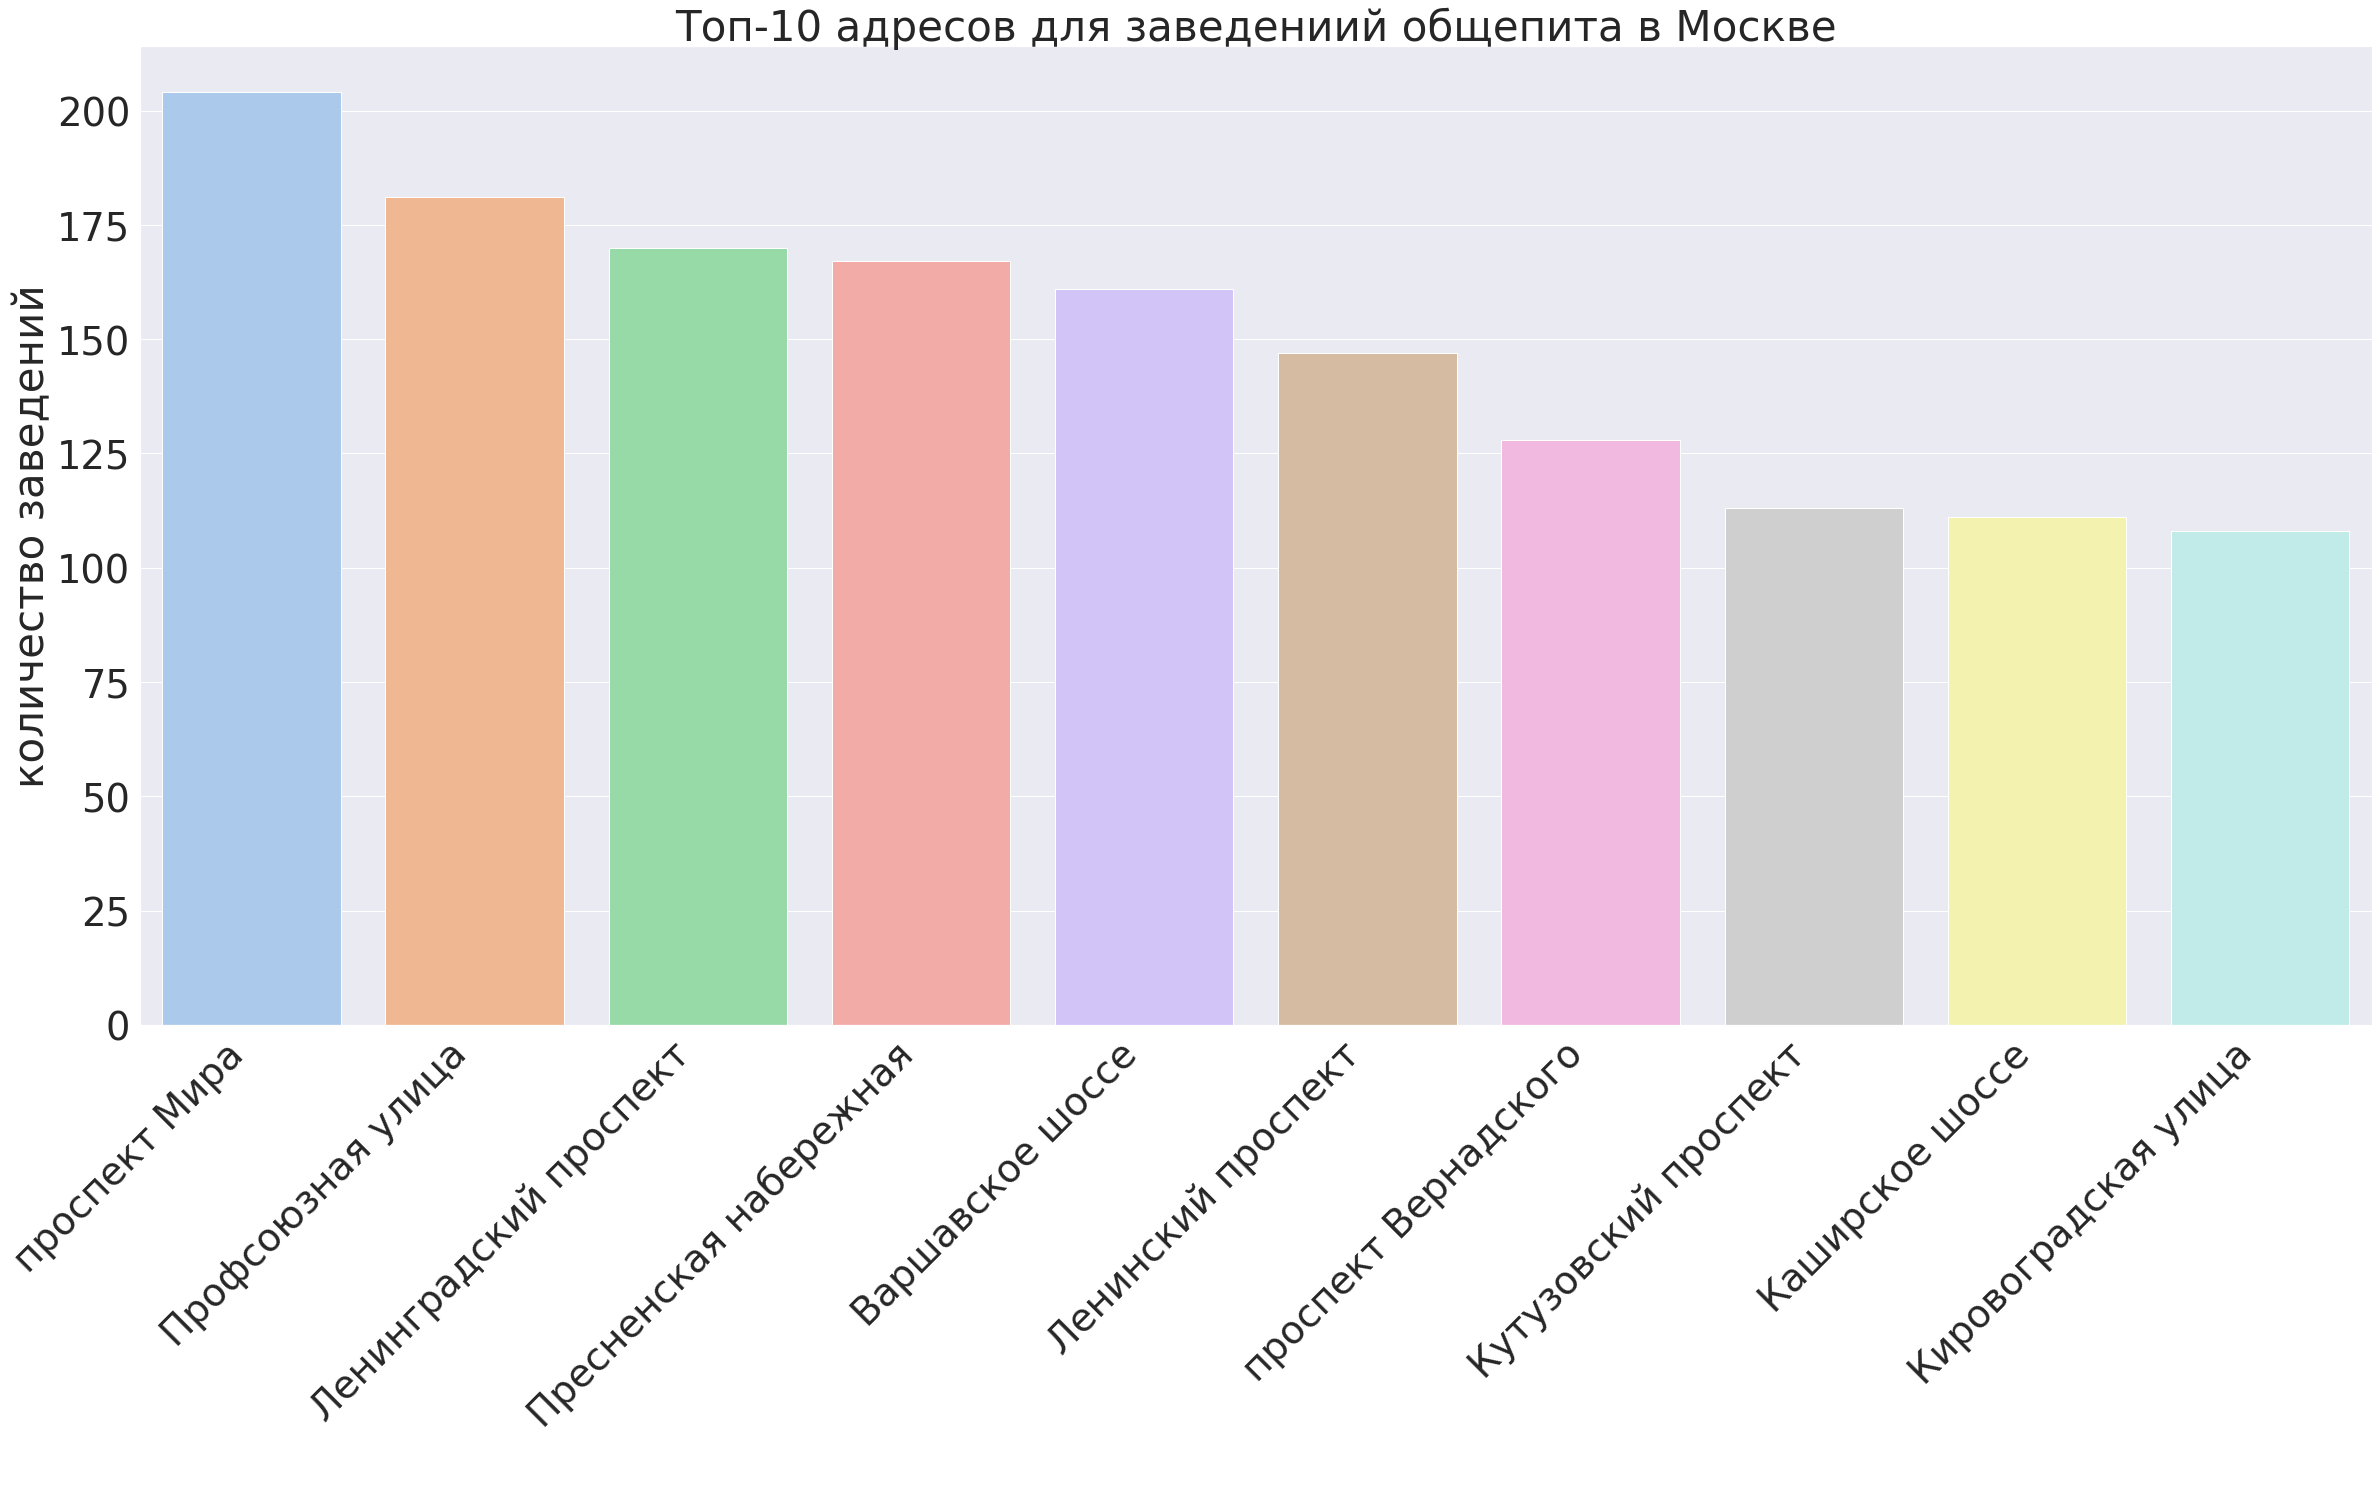

In [44]:
plt.figure(figsize=(40,20))
sns.set(font_scale=3.5, palette='pastel') #настройка размера шрифта и палетки

ax = sns.barplot(x='street', y= 'count', data=popular_district_top10)
ax.set_xlabel(' ')
ax.set_ylabel('количество заведений')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х
ax.set_title('Топ-10 адресов для заведениий общепита в Москве');

Получим список топ-10 улиц:

In [45]:
popular_district.query('street != "город Зеленоград"').index[:10].tolist()  #получаем список топ-10 адресов 

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

#### Выводы:

По графику видно, что в топ-10 улиц по количеству заведений общепита в Москве  входят:
* ' проспект Мира '- Мещанский район,
* ' Профсоюзная улица ' - Академический район,
* ' Ленинградский проспект ' - Беговой район,
* ' Пресненская набережная ' - Пресненский район,
* ' Варшавское шоссе ' - район Южный аддминистративный округ,
* ' Ленинский проспект ' - район Якиманка,
* ' проспект Вернадского ' - район Проспект Вернадского,
* ' Кутузовский проспект '- район Дорогомилово,
* ' Каширское шоссе ' - район Москворечье-Сабурово
* ' Кировоградская улица ' -  Чертаново Северное


В этих районах очень много заведений общепита, в связи с чем, открытие заведения общепита в таком районе не рекомендуется, так как высока вероятность малого спроса и проходимости.

### Анализ улиц с одним заведением общепита в Москве

Определим число улиц с одним объектом общественного питания. 
С помощью данных из внешних источников информации ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [46]:
not_popular = popular_district[popular_district['count'] == 1].reset_index()
display(not_popular.shape)
display(not_popular.head())
display(not_popular.info())

(586, 2)

,street,count
0,2-я улица Марьиной Рощи,1
1,улица Жебрунова,1
2,1-й Обыденский переулок,1
3,улица Екатерины Будановой,1
4,улица Гамалеи,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  586 non-null    object
 1   count   586 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


None

Таким образом, есть около 585 заведений общепита, котрые являются единственными на улице.

Посмотрим, в каких районах располагаются данные адреса.

Для этого мы pагрузили сторонний файл `street_district`, где указаны улицы, и районы Москвы, к оторым относятся эти улицы.
Последовательно объеденим таблицы. Сначала ознакомимся с таблицами:

In [47]:
street_district.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


В таблице `street_district` есть два необходимых нам столбца: 
* полное название улицы `streetname`
* район `area`

Оставим только эти столбцы в таблице:

In [48]:
str_distr_final = street_district[['streetname', 'area', 'okrug']] #сохраняем необходимые столбцы в новой переменной 
str_distr_final = str_distr_final.rename(columns={'streetname':'street'}) #переименовали столбец
display(str_distr_final.head())
str_distr_final.info()

,street,area,okrug
0,Выставочный переулок,Пресненский район,ЦАО
1,улица Гашека,Пресненский район,ЦАО
2,Большая Никитская улица,Пресненский район,ЦАО
3,Глубокий переулок,Пресненский район,ЦАО
4,Большой Гнездниковский переулок,Пресненский район,ЦАО


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  4398 non-null   object
 1   area    4398 non-null   object
 2   okrug   4398 non-null   object
dtypes: object(3)
memory usage: 103.2+ KB


В таблице верный тип данных.

Присоеденим таблицу с названиями улиц и районами, к которым эти улицы относятся с таблице, где указаны улицы 1 заведениям  общепита:

In [49]:
not_popular.head() #улицы с количеством заведений 1

,street,count
0,2-я улица Марьиной Рощи,1
1,улица Жебрунова,1
2,1-й Обыденский переулок,1
3,улица Екатерины Будановой,1
4,улица Гамалеи,1


In [50]:
final = not_popular.merge(str_distr_final, on='street', how='left') #объединяем таблицы
final = final.drop(labels='count', axis=1) #удаляем столбец с количеством заведений 
final.head()

,street,area,okrug
0,2-я улица Марьиной Рощи,Район Марьина роща,СВАО
1,улица Жебрунова,Район Сокольники,ВАО
2,1-й Обыденский переулок,Район Хамовники,ЦАО
3,улица Екатерины Будановой,Район Кунцево,ЗАО
4,улица Гамалеи,Район Щукино,СЗАО


Таким образом, получилась таблица, где указаны улицы,районы и округи, в которых располагаются улицы с 1  заведением общепита (всего 100 районов).

Посмотрим на информацию о таблице.

In [51]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  633 non-null    object
 1   area    564 non-null    object
 2   okrug   564 non-null    object
dtypes: object(3)
memory usage: 19.8+ KB


В таблице есть пропущенные значения в столбце area и okrug. Вычислим долю пропущенных значений.

In [52]:
len(final[final['area'].isna()])

69

В таблице пропущено около  10 % значений в столбце area. 

Теперь посмотрим, в каких районах располагаются улицы с 1 завдением общепита в Москве.

In [53]:
area_distribution = (final
                     .groupby('area')['okrug']
                     .count()
                     .reset_index()
                     .sort_values(by='okrug', ascending=False)) 
area_distribution = area_distribution.rename(columns={'street':'count'})
display(area_distribution.info())
area_distribution.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 94 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    100 non-null    object
 1   okrug   100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


None

,area,okrug
94,Таганский район,27
80,Район Хамовники,26
3,Басманный район,25
95,Тверской район,20
21,Пресненский район,19


In [54]:
#получаем список из топ-10 районов с наибольшим количеством улиц с 1 заведением общепита
list(area_distribution['area'].head(10))

['Таганский район',
 'Район Хамовники',
 'Басманный район',
 'Тверской район',
 'Пресненский район',
 'Район Марьина роща',
 'Мещанский район',
 'Район Арбат',
 'Район Замоскворечье',
 'Район Лефортово']

Улицы, на которых расположено одно заведение общепита расположены в 100 районах Москвы. 
Топ-10 районов по количество улиц с одним заведением общепита  составляют следущие районы:
* 'Таганский район',
* 'Район Хамовники',
* 'Басманный район',
* 'Тверской район',
* 'Пресненский район',
* 'Район Марьина роща',
* 'Мещанский район',
* 'Район Арбат',
* 'Район Замоскворечье',
* 'Район Лефортово'

Получим полный список районов, где располагаются улицы с одним заведением общепита:

In [55]:
area_distribution['area'].unique()  #получаем список топ-10 районов 

array(['Таганский район', 'Район Хамовники', 'Басманный район',
       'Тверской район', 'Пресненский район', 'Район Марьина роща',
       'Мещанский район', 'Район Арбат', 'Район Замоскворечье',
       'Район Лефортово', 'Район Соколиная Гора', 'Район Якиманка',
       'Район Сокольники', 'Даниловский район', 'Район Богородское',
       'Красносельский район', 'Район Южное Бутово',
       'Нижегородский район', 'Район Внуково', 'Можайский Район',
       'Район Аэропорт', 'Район Люблино', 'Алексеевский район',
       'Лосиноостровский район', 'Тимирязевский Район',
       'Район Преображенское', 'Савеловский район', 'Донской район',
       'Дмитровский район', 'Район Кунцево', 'Район Солнцево',
       'Район Измайлово', 'Район Хорошево-Мневники', 'Район Ростокино',
       'Район Митино', 'Район Ново-Переделкино', 'Район Выхино-Жулебино',
       'Район Ясенево', 'Рязанский район', 'Южнопортовый Район',
       'Район Щукино', 'Хорошевский район', 'Головинский район',
       'Район Южное 

Посмотрим, в каких округах чаще всего встречаются улицы с одним заведением общепита на всей улице:

In [56]:
okrug_distribution = (final
                     .groupby('okrug')['area']
                     .count()
                     .reset_index()
                     .sort_values(by='area', ascending=False)) 
okrug_distribution = okrug_distribution.rename(columns={'street':'count'})
display(okrug_distribution.info())
okrug_distribution.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 6 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   okrug   10 non-null     object
 1   area    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


None

,okrug,area
6,ЦАО,186
0,ВАО,67
4,СВАО,66
3,САО,55
8,ЮВАО,55


Построим график:

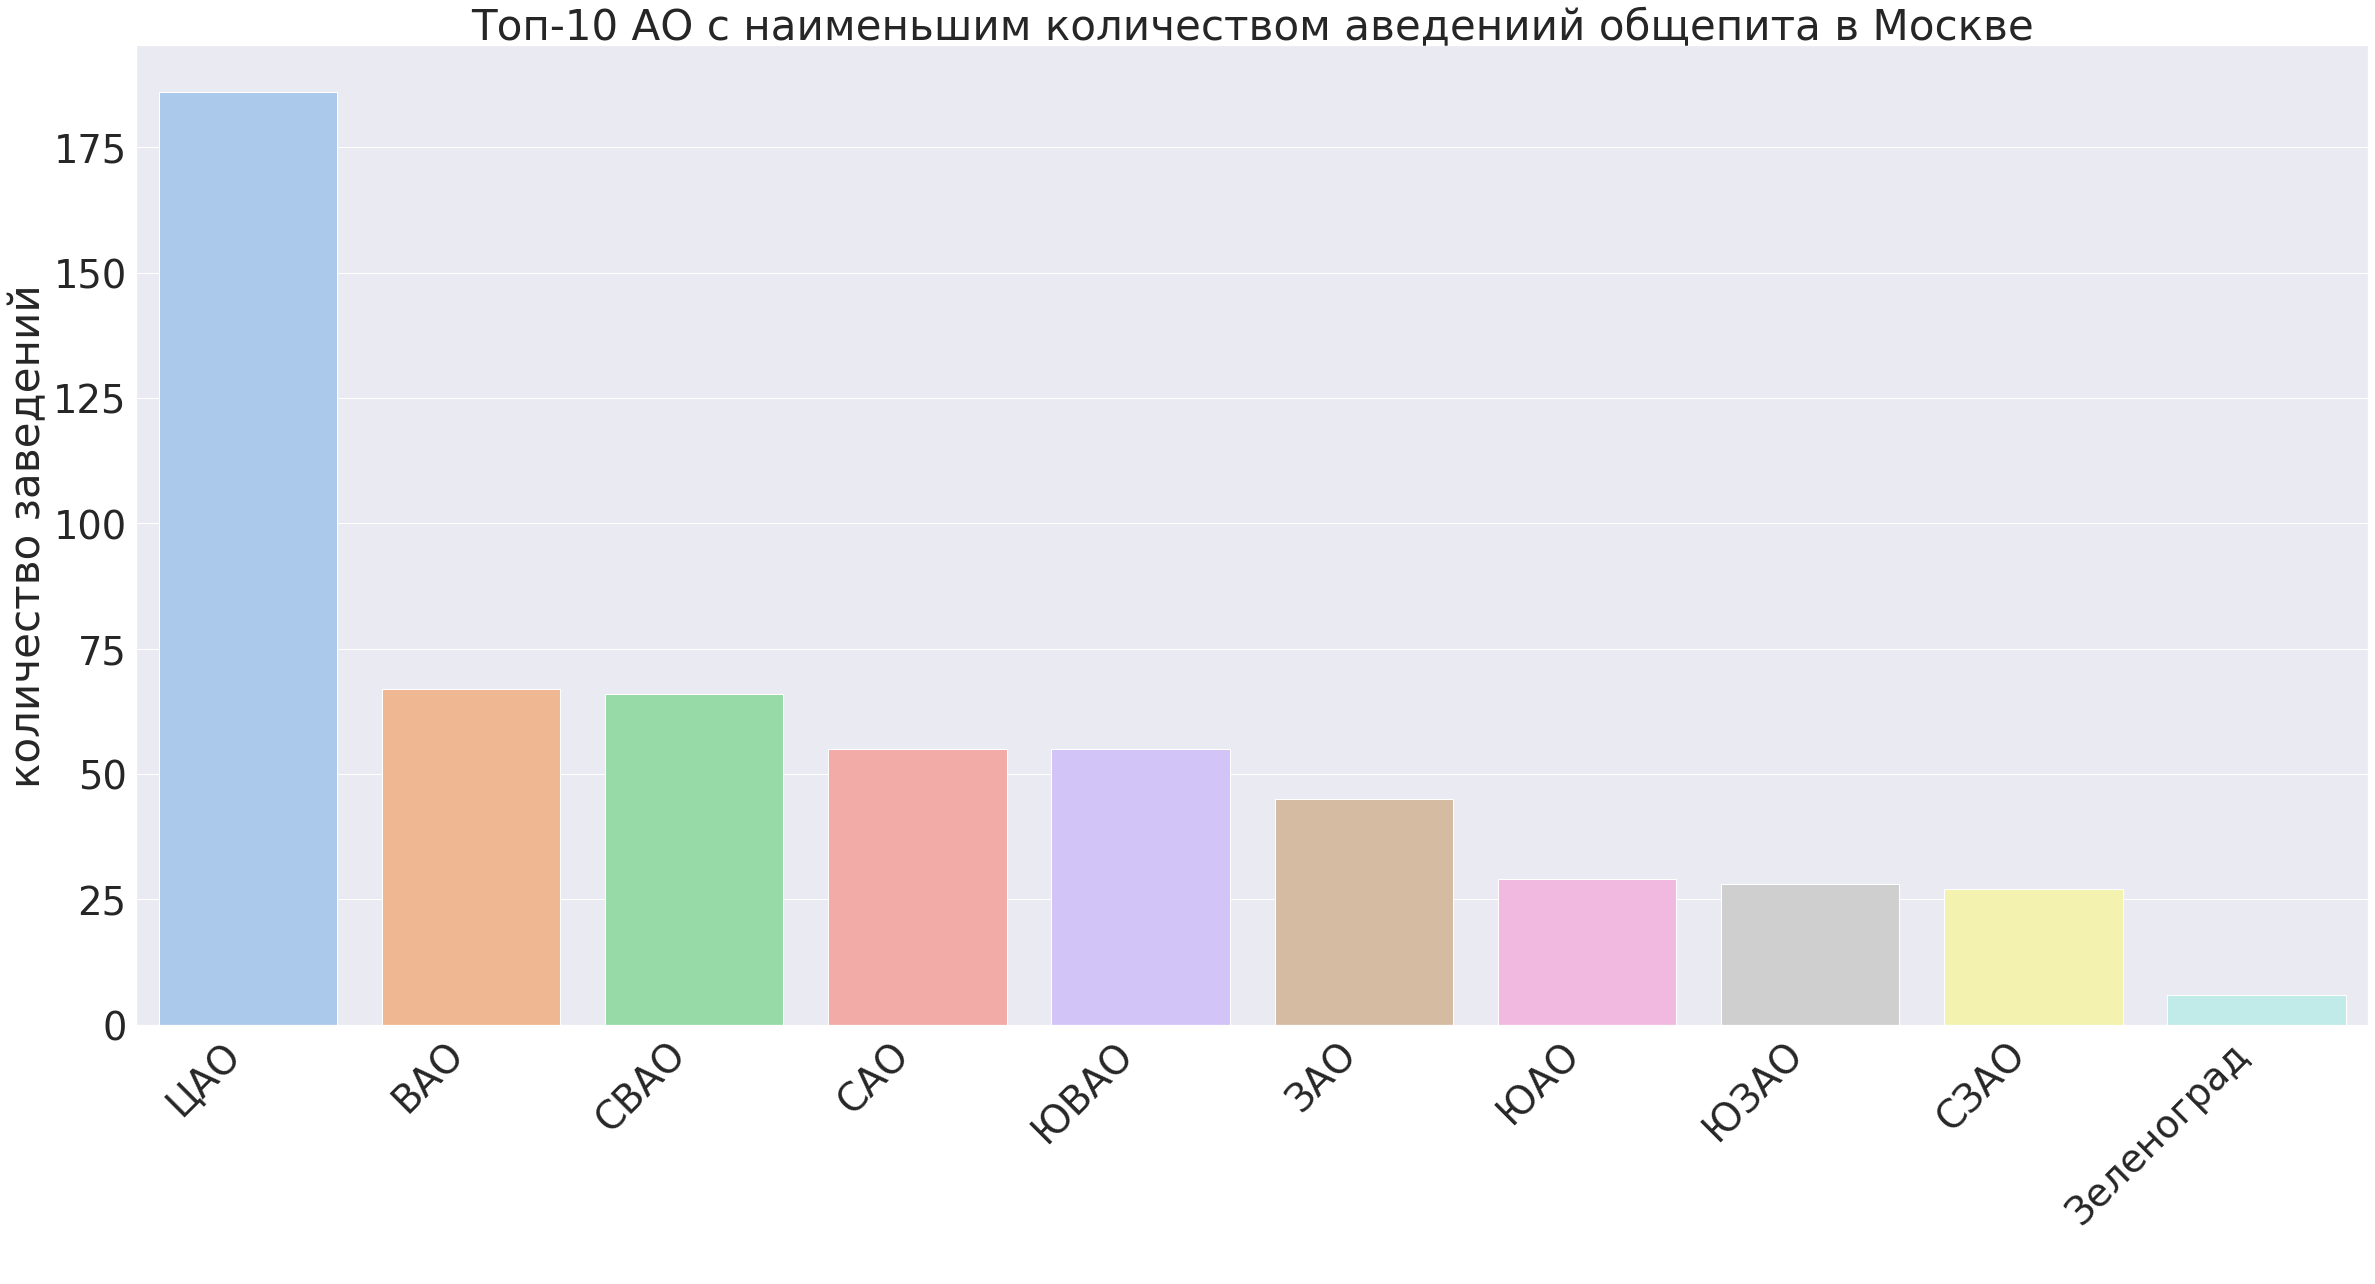

In [57]:
plt.figure(figsize=(40,20))
sns.set(font_scale=3.5, palette='pastel') #настройка размера шрифта и палетки

ax = sns.barplot(x='okrug', y= 'area', data=okrug_distribution)
ax.set_xlabel(' ')
ax.set_ylabel('количество заведений')
ax.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х
ax.set_title('Топ-10 АО с наименьшим количеством аведениий общепита в Москве');

In [58]:
list(okrug_distribution['okrug'].head(10))

['ЦАО',
 'ВАО',
 'СВАО',
 'САО',
 'ЮВАО',
 'ЗАО',
 'ЮАО',
 'ЮЗАО',
 'СЗАО',
 'Зеленоград']

#### Выводы:

Таким образом, мы выяснили, в каких районах располагаются улицы, с 1 заведением общепита в Москве (100 районов):
1. Топ-10 районов по количеству улиц с 1 заведением общепита в Москве составляют (в порядке убывания количества):
* 'Таганский район',
* 'Район Хамовники',
* 'Басманный район',
* 'Тверской район',
* 'Пресненский район',
* 'Район Марьина роща',
* 'Мещанский район',
* 'Район Арбат',
* 'Район Замоскворечье',
* 'Район Лефортово'

2. Топ-10 округов по количеству улиц с 1 заведением общепита в Москве составляют (в порядке убывания количества):
* 'ЦАО',
* 'ВАО',
* 'СВАО',
* 'САО',
* 'ЮВАО',
* 'ЗАО',
* 'ЮАО',
* 'ЮЗАО',
* 'СЗАО',
* 'Зеленоград'

### Распределение посадочных мест  для улиц с большим количеством объектов общепита

Посмотрим на распределние количества посадочных мест для улиц с большим количеством объектов общепита. 

In [59]:
df.head()

,object_name,chain,object_type,address,number,object_name_new,street
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,Абельмановская улица
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,Абрамцевская улица


Ранее, мы создали таблицу, где собрали улицы и количество заведений общепита на этих улицах и отсортировали таблицу. 
Получим первые 10 улиц в виде списка:

In [60]:
popular_district.query('street != "город Зеленоград"').head(10).index.tolist() #получаем топ-10 улиц по количеству заведений в виде списка 

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

Далее, используем данный список как фильтр, что бы не писать все названия улиц "вручную":

In [61]:
filt = ['проспект Мира', #список с названиями улиц, т.е. фильтр 
    'Профсоюзная улица',
    'Ленинградский проспект',
    'Пресненская набережная',
    'Варшавское шоссе',
    'Ленинский проспект',
    'проспект Вернадского',
    'Кировоградская улица',
    'Кутузовский проспект',
    'Каширское шоссе']

df_popular = df.query('street in @filt') #отфильтрованная таблица в новой переменной 
df_popular.head()

,object_name,chain,object_type,address,number,object_name_new,street
151,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,кафе андерсон,Варшавское шоссе
152,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,кафе subway,Варшавское шоссе
153,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,кафе ламаджо,Варшавское шоссе
154,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,шаурма в пите,Варшавское шоссе
155,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,выпечка,Варшавское шоссе


Проверим, что в таблице сохранены необходимые нам удицы. посмотрим, на список уникальных навзаний улиц:

In [62]:
df_popular['street'].unique()  #получаем список уникальных улиц

array(['Варшавское шоссе', 'проспект Вернадского', 'Кутузовский проспект',
       'Каширское шоссе', 'Кировоградская улица',
       'Ленинградский проспект', 'Ленинский проспект', 'проспект Мира',
       'Профсоюзная улица', 'Пресненская набережная'], dtype=object)

Фильтр успешно применен. Далее посмотрим, как распределено количество посадочных мест на этих улицах.

In [63]:
pop_strett_numb = df_popular.pivot_table(index=['street', 'number'],
                                         values='chain',
                                         aggfunc='count').reset_index()#.sort_values(by='id', ascending=False)
pop_strett_numb.head(10)

,street,number,chain
0,Варшавское шоссе,0,21
1,Варшавское шоссе,1,1
2,Варшавское шоссе,2,7
3,Варшавское шоссе,3,1
4,Варшавское шоссе,4,2
5,Варшавское шоссе,5,1
6,Варшавское шоссе,6,2
7,Варшавское шоссе,7,2
8,Варшавское шоссе,8,5
9,Варшавское шоссе,10,5


Построим график:

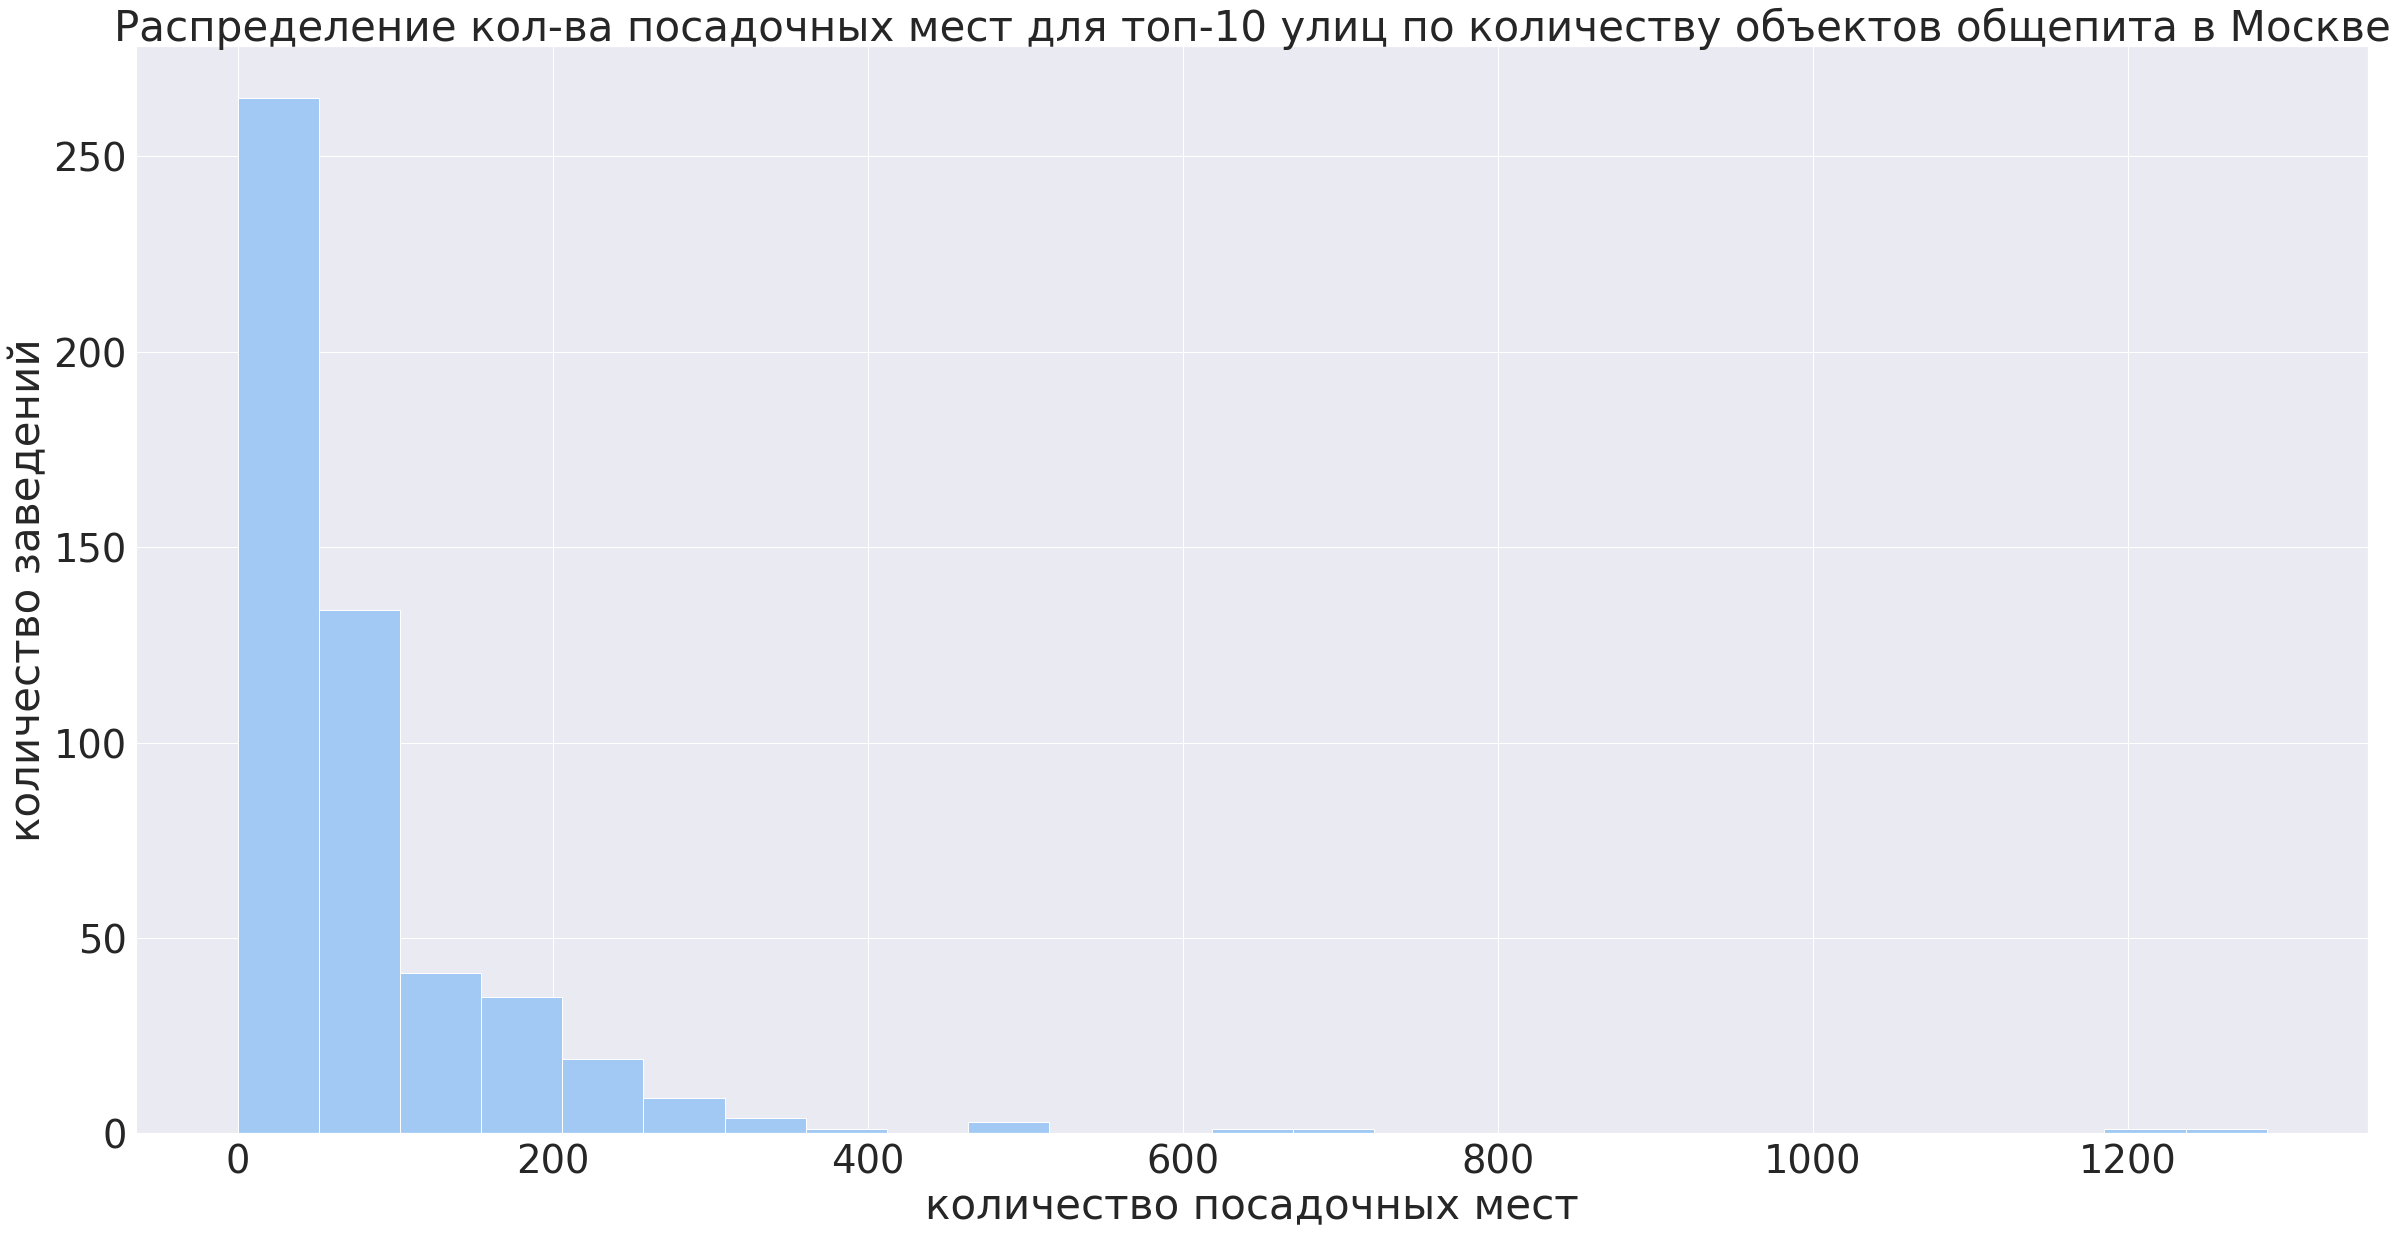

In [64]:
plt.figure(figsize=(40,20))

plt.hist(x='number', data=pop_strett_numb, bins=25 )
plt.xlabel('количество посадочных мест')
plt.ylabel('количество заведений')
plt.title('Распределение кол-ва посадочных мест для топ-10 улиц по количеству объектов общепита в Москве');

#### Выводы:

По графику видно, что для топ-10  улиц по количеству объектов общепита характерно большое количество заведений с малым количеством мест (до 100).

## Общие выводы и рекомендации:

### Общие выводы:

1. Типы заведений общественного питания в Москве:
* больше всего заведений типа "кафе" (около 40 %)
* меньше всего заведений типа "магазин(отдел кулинарии)" (менее 5 %)

2. Распределение сетевых и несетевых заведений общественного питания в Москве:
* больше всего несетевых заведений (81 %)
* меньше всего сетевых заведений (19 %)

3. Особенности заведений общественного питания в Москве по распространению (сетевые и несетевые):
* характерно сетевое распространение  для объектов вида "кафе" , "предприятие быстрого обслуживания" и "ресторан"
* НЕ характерно сетевое распространение для объектов типа "буфет" и "столовая" 
    
4. Характерная особенность сетевых объектов является много заведений с небольшим количеством посадочных мест.

* малое количество посадочных мест-это заведения с количеством посадочных мест от 0 до 100 мест
* среднее количество посадочных мест -это заведение с количествои посадочных мест от 100 до 250 мест 
* большое количество посадочных мест -это завдения с количеством посадочных мест от 250 и более мест

5. Среднее количество посадочных мест в заведениях общепита в Москве:
* столовые в среднем предлагают около 125 посадочных мест
* рестораны - около 90 посадочных мест
* буфеты - около 50 мест 
* бары - чуть больше 40 мест
* кафе  - около 40 
* предприятия быстрого обслуживания - около 20
* кафетерии - около 10
* закусочные и магазины предоставляют около 5 посадочных мест 

Так же, отметим что наибольшее количество посадочных мест из всех видов объектов общепита в Москве представляют столовые

6. Топ-10 улиц по количеству заведений общепита в Москве  входят:
* ' проспект Мира '- Мещанский район,
* ' Профсоюзная улица ' - Академический район,
* ' Ленинградский проспект ' - Беговой район,
* ' Пресненская набережная ' - Пресненский район,
* ' Варшавское шоссе ' - район Южный аддминистративный округ,
* ' Ленинский проспект ' - район Якиманка,
* ' проспект Вернадского ' - район Проспект Вернадского,
* ' Кутузовский проспект '- район Дорогомилово,
* ' Каширское шоссе ' - район Москворечье-Сабурово
* ' Кировоградская улица ' -  район Чертаново Северное


В этих районах очень много заведений общепита, в связи с чем, открытие заведения общепита в таком районе не рекомендуется, так как высока вероятность малого спроса и проходимости.

7. Топ-10 районов по количеству улиц с одним заведением общепита в Москве составляют (в порядке убывания количества):
* 'Таганский район',
* 'Район Хамовники',
* 'Басманный район',
* 'Тверской район',
* 'Пресненский район',
* 'Район Марьина роща',
* 'Мещанский район',
* 'Район Арбат',
* 'Район Замоскворечье',
* 'Район Лефортово'

8. Топ-10 округов по количеству улиц с одним заведением общепита в Москве составляют (в порядке убывания количества):
* 'ЦАО',
* 'ВАО',
* 'СВАО',
* 'САО',
* 'ЮВАО',
* 'ЗАО',
* 'ЮАО',
* 'ЮЗАО',
* 'СЗАО',
* 'Зеленоград'

9. Для топ-10  улиц по количеству объектов общепита характерно большое количество заведений с малым количеством мест (до 100).

### Рекомендации:



Проанализировав открытые данные о заведениях общественного питания в Москве для открытия небольшого кафе, где гостей должны обслуживать роботы, можно рекомендовать следующее:

1. Вид заведения:
* наиболее популярным видом заведения общепита является кафе, то есть конкуренция высокая. 

Однако, вспомним,что в будущем заведении посетителей будут обслуживать роботы, то есть это кафе, которое не имеет аналогов в Москве. В связи с чем прямой конкуренции с будущим кафе не будет. 

Таким образом, рекомендуется рассмотреть следующие виды объектов общепита в Москве:
* кафе
* столовая 
* ресторан 
* предприятие быстрого обслуживания 

2. Количество посадочных мест:
Рекомендуется определять количество посадочных мест, исходя из вида объекта общепита.
Возможно рассмотреть следующее количество средних посадочных мест :
* столовая в среднем предлагает около 130 посадочных мест
* ресторан	около 96 посадочных мест
* кафе	около 39 мест
* предприятие быстрого обслуживания	около 20 мест

3. Район расположения:

Рекомендуется рассмотреть следующие районы. Это топ-10 районов с наибольшим количеством улиц с одним заведением общепита в Москве:
* Таганский район
* Район Хамовники
* Басманный район
* Тверской район
* Пресненский район
* Район Марьина роща
* Мещанский район
* Район Арбат
* Район Замоскворечье
* Район Лефортово

Есть районы с большим количеством заведений общепита, в связи с чем, открытие заведения общепита в таком районе не рекомендуется, так как высока вероятность малого спроса и проходимости. К ним относятся:

* Мещанский район
* Академический район
* Беговой район
* Пресненский район
* район Южный аддминистративный округ
* район Якиманка
* район Проспект Вернадского
* город Зеленоград 
* район Дорогомилово,
* район Москворечье-Сабурово


4. Возможность развития сети:

Сетевое распространение характерно для объектов типа "кафе", "предприятие быстрого обслуживания" и "ресторан".

Характерная особенность сетевых объектов является много заведений с небольшим количеством посадочных мест.

Таким образом, для открытия кафе, где посетителей будут обслуживать роботы в Мосвке с перспективой на сетевое распростарнение рекомендуется:
* тип заведения: "кафе", "предприятие быстрого обслуживания" или "ресторан"
* большое количество объектов, с небольшим количеством мест (до 100)
* в районах: Таганский район, Район Хамовники, Басманный район, Тверской район, Пресненский район, Район Марьина роща, Мещанский район, Район Арбат, Район Замоскворечье, Район Лефортово
